# Arrests dataset

In [10]:
# Loading the data set

data("USArrests")

In [2]:
# Remove any missing value (i.e, NA values for not available)
# That might be present in the data

df <- na.omit(USArrests)

In [3]:
# Previewing our dataset

head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [4]:
# Before hierarchical clustering, we can compute some descriptive statistics

desc_stats <- data.frame(
  Min = apply(df, 2, min),    # minimum
  Med = apply(df, 2, median), # median
  Mean = apply(df, 2, mean),  # mean
  SD = apply(df, 2, sd),      # Standard deviation
  Max = apply(df, 2, max)     # Maximum
)
desc_stats <- round(desc_stats, 1)
head(desc_stats)

,Min,Med,Mean,SD,Max
Murder,0.8,7.2,7.8,4.4,17.4
Assault,45.0,159.0,170.8,83.3,337.0
UrbanPop,32.0,66.0,65.5,14.5,91.0
Rape,7.3,20.1,21.2,9.4,46.0


In [5]:
# we start by scaling the data using the R function scale() as follows
 
df <- scale(df)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [7]:
# First we use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix

d <- dist(df, method = "euclidean")

In [8]:
# We then hierarchical clustering using the Ward's method

res.hc <- hclust(d, method = "ward.D2" )

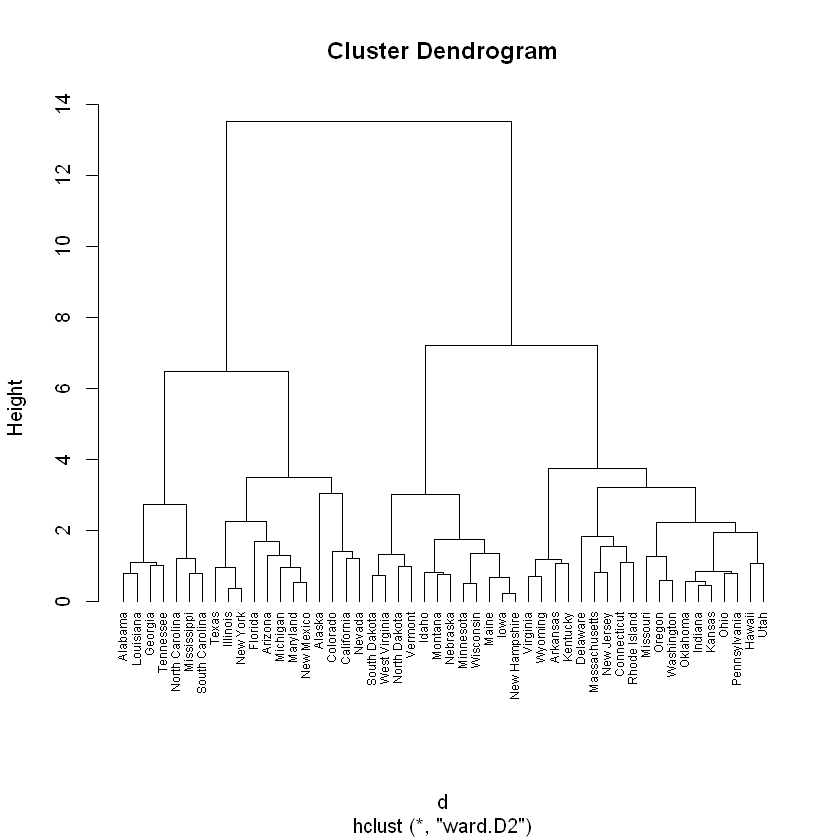

In [9]:
# Lastly, we plot the obtained dendrogram

plot(res.hc, cex = 0.6, hang = -1)

## IRIS DATASET

In [11]:
#Loading our dataset

iris = iris

In [12]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [15]:
#Dropping Species column

iris.new= iris[, c(1,2,3,4)]
iris.class= iris[,'Species']
head(iris.new)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [17]:
head(iris.class)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

> SCATTER PLOT MATRIX (SPLOM)

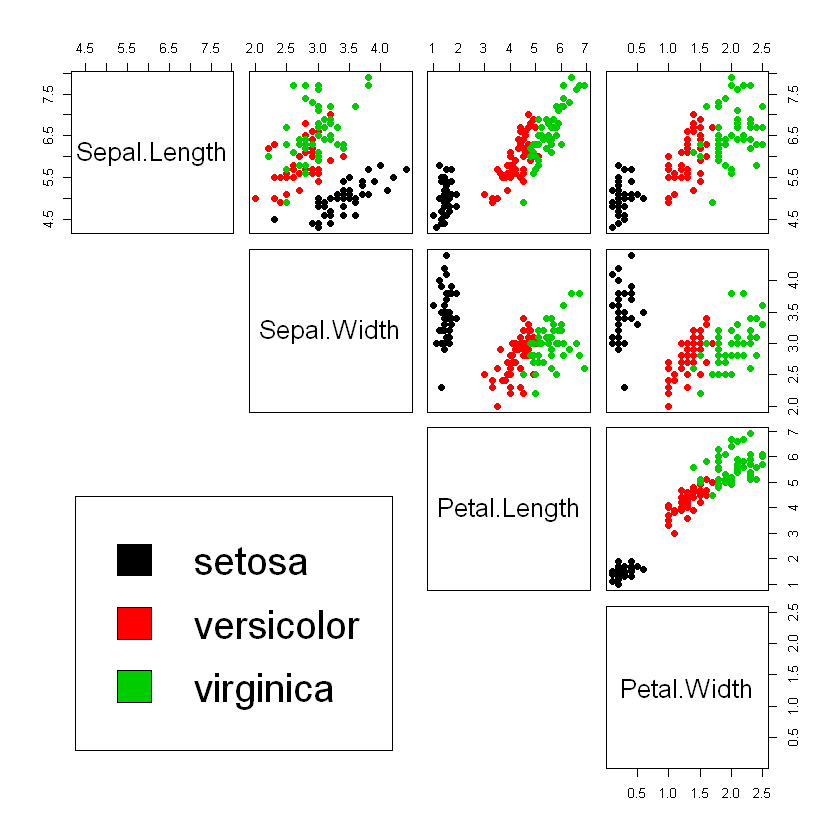

In [18]:
#Plotting a SPLOM

pairs(iris.new, col = iris.class,
     lower.panel= NULL,
     cex.labels= 2, pch = 19, cex= 1.2)

#Add a legend
par(xpd= TRUE)
legend(x= 0.05, y= 0.4, cex= 2,
      legend=as.character(levels(iris.class)),
      fill= unique(iris.class))
par(xpd= NA)


We can see that the Setosa species are distinctly different from Versicolor and Virginica (they have lower petal length and width). 

But Versicolor and Virginica cannot easily be separated based on measurements of their sepal and petal width/length.

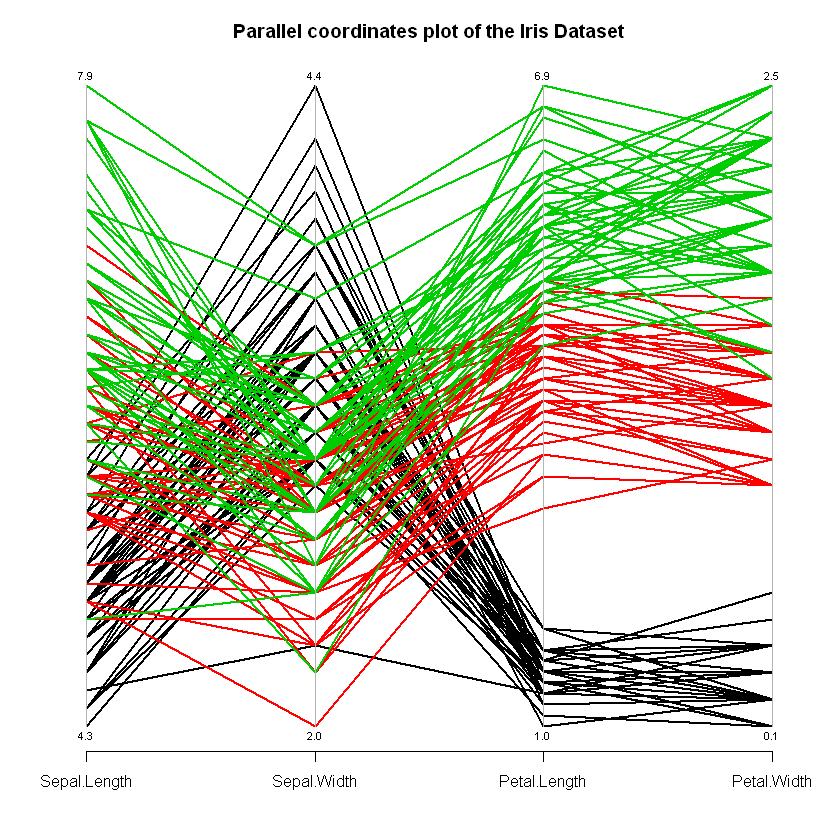

In [20]:
#Pararllel Coordinates plot of the data

par(las= 1, mar= c(4.5, 3,3,2) + 0.1, cex= 0.8)
MASS::parcoord(iris.new, col= iris.class, var.label= TRUE, lwd= 2)

#Add Title
title("Parallel coordinates plot of the Iris Dataset")

#Add a legend
par(xpd= TRUE)
legend(x= 1.75, y= -0.25, cex= 1,
      legend= as.character(levels(iris.class)),
      fill= unique(iris.class), horiz= TRUE)

> THE 3 CLUSTERS FROM THE “COMPLETE” METHOD VS THE REAL SPECIES CATEGORY

The default hierarchical clustering method in hclust is “complete”.

We will visualize the result of running it by turning the object to a dendrogram and making several adjustments to the object, such as: changing the labels, coloring the labels based on the real species category, and coloring the branches based on cutting the tree into three clusters.

In [21]:
d_iris = dist(iris.new)
hc_iris = hclust(d_iris, method= 'complete')
iris.class = rev(levels(iris[,5]))

In [23]:
install.packages('dendextend')

also installing the dependencies 'gridExtra', 'viridis'



package 'gridExtra' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp6XZBE7\downloaded_packages


In [26]:
library(dendextend)
dend = as.dendrogram(hc_iris)

#Order it to the closest we can to order of the observations:

dend = rotate(dend, 1:150)

In [28]:
#Color the branches based on clusters

dend = color_branches(dend, k=3)

#Manually match the labels, as much as possible, to the real classification of the flowers:

labels_colors(dend) <-
   rainbow_hcl(3)[sort_levels_values(
      as.numeric(iris[,5])[order.dendrogram(dend)]
   )]


In [30]:
#Add flower type to the labels

labels(dend) <- paste(as.character(iris[,5])[order.dendrogram(dend)],
                           "(",labels(dend),")", 
                           sep = "")

In [32]:
#We hang the dendrogram a bit:

dend= hang.dendrogram(dend, hang_height = 0.1)

#Reduce the size of the labels:

dend= set(dend, 'labels_cex', 0.5)

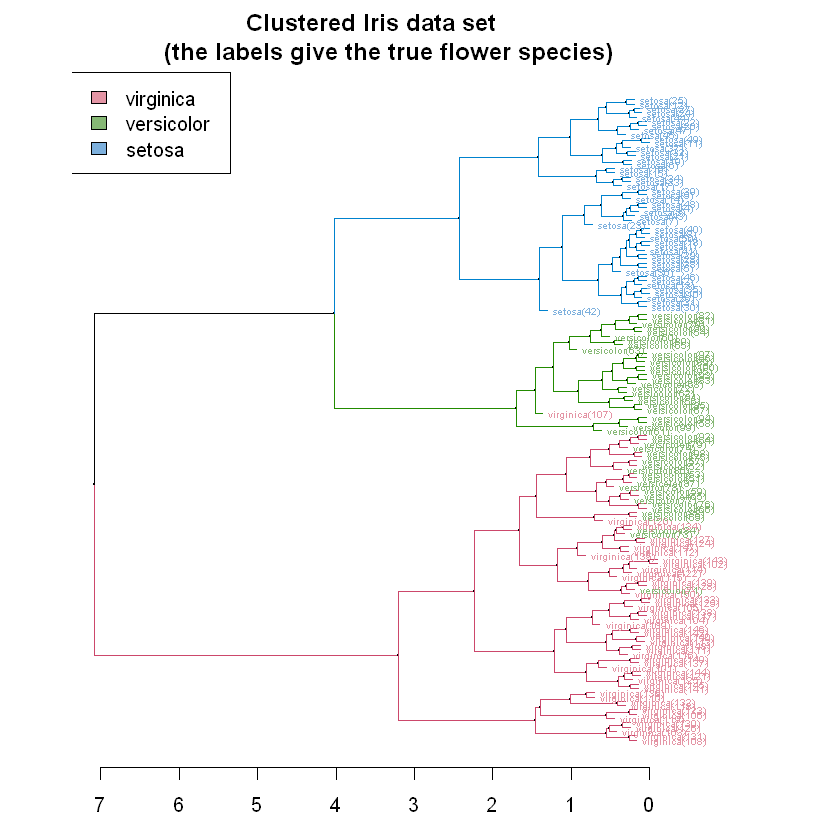

In [38]:
#Plot

par(mar = c(3,3,3,7))
plot(dend, 
     main = "Clustered Iris data set
     (the labels give the true flower species)", 
     horiz =  TRUE,  nodePar = list(cex = .007))
legend("topleft", legend = iris.class, fill = rainbow_hcl(3))

In [40]:
install.packages("circlize")

also installing the dependencies 'GlobalOptions', 'shape'



package 'GlobalOptions' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'circlize' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp6XZBE7\downloaded_packages


Loading required namespace: circlize


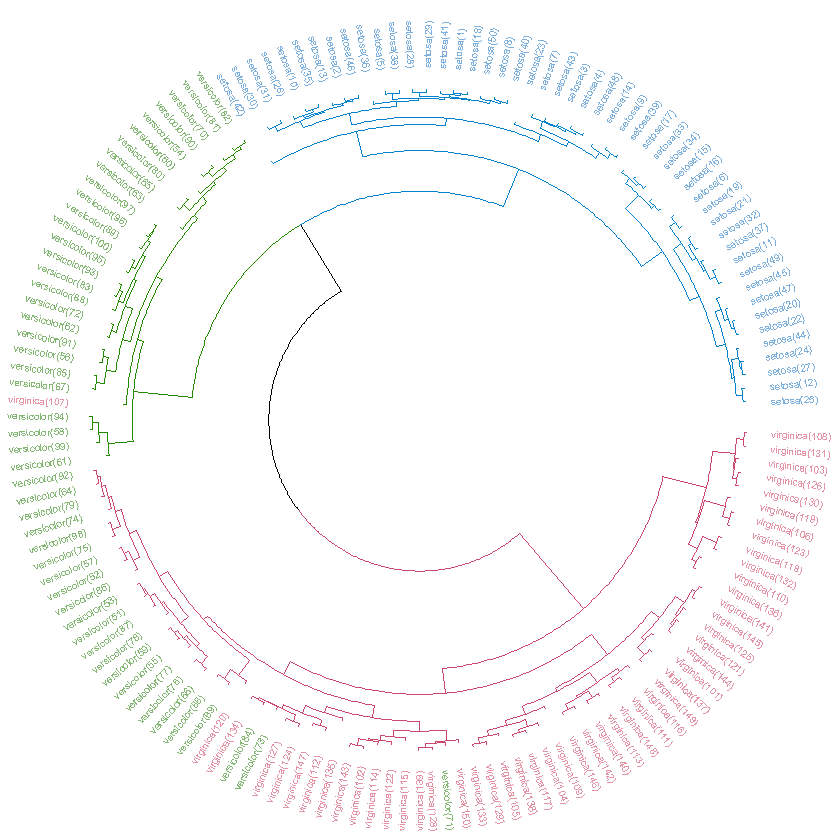

In [41]:
#Represent the same in a circular layout

par(mar= rep(0,4))
circlize_dendrogram(dend)

These visualizations easily demonstrates how the separation of the hierarchical clustering is very good with the “Setosa” species, but misses in labeling many “Versicolor” species as “Virginica”.

The hanging of the tree also helps to locate extreme observations. For example, we can see that observation “virginica (107)” is not very similar to the Versicolor species, but still, it is among them. Also, “Versicolor (71)” is located too much “within” the group of Virginica flowers.

> HEATMAP CORRELATION

The rows are ordered based on the order of the hierarchical clustering (using the “complete” method). The colored bar indicates the species category each row belongs to. The color in the heatmap indicates the length of each measurement (from light yellow to dark red).

In [44]:
install.packages('gplots')

also installing the dependencies 'bitops', 'gtools', 'gdata', 'caTools'



package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp6XZBE7\downloaded_packages


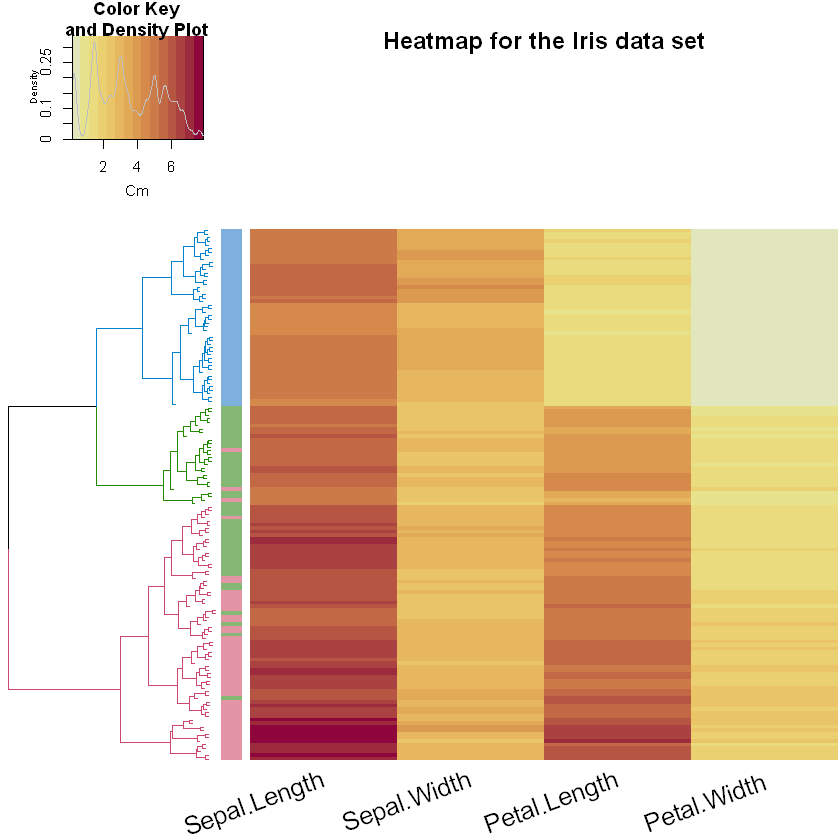

In [46]:
some_col_func = function(n) rev(colorspace:: heat_hcl(n, c= c(80,30), l= c(30, 90), power= c(1/5, 1.5)))

gplots::heatmap.2(as.matrix(iris.new), 
          main = "Heatmap for the Iris data set",
          srtCol = 20,
          dendrogram = "row",
          Rowv = dend,
          Colv = "NA", # this to make sure the columns are not ordered
          trace="none",          
          margins =c(5,0.1),      
          key.xlab = "Cm",
          denscol = "grey",
          density.info = "density",
          RowSideColors = rev(labels_colors(dend)), # to add nice colored strips        
          col = some_col_func
         )

> INTERACTIVE HEATMAP

> We can get an interactive heatmap by using the d3heatmap package/function:

In [48]:
install.packages('d3heatmap')

also installing the dependency 'png'



package 'png' successfully unpacked and MD5 sums checked
package 'd3heatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp6XZBE7\downloaded_packages


In [67]:
d3heatmap::d3heatmap(as.matrix(iris.new),
          dendrogram = "row",
          Rowv = dend,
          colors = "Greens",
          # scale = "row",
          width = 1000,
                     height= 800,
          show_grid = FALSE)

HTML widgets cannot be represented in plain text (need html)

In [66]:
#?d3heatmap

> SIMILARITY/DIFFERENCE BETWEEN VARIOUS CLUSTERING ALOGRITHM

hclust has 8 different algorithms implemented). For the purpose of this analysis, we will create all 8 hclust objects, and chain them together into a single dendlist object (which, as the name implies, can hold a bunch of dendrograms together for the purpose of further analysis

In [51]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")
iris_dendlist <- dendlist()
for(i in seq_along(hclust_methods)) {
   hc_iris <- hclust(d_iris, method = hclust_methods[i])   
   iris_dendlist <- dendlist(iris_dendlist, as.dendrogram(hc_iris))
}
names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

$single
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

$complete
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

$average
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

$mcquitty
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

$median
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

$centroid
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

$ward.D2
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"

We look at the cophenetic correlation between each clustering result using cor.dendlist. (This can be nicely plotted using the corrplot function from the corrplot package)

In [52]:
iris_dendlist_cor <- cor.dendlist(iris_dendlist)
iris_dendlist_cor

,ward.D,single,complete,average,mcquitty,median,centroid,ward.D2
ward.D,1.0000000,0.9836838,0.5774013,0.9841333,0.9641103,0.9451815,0.9809088,0.9911648
single,0.9836838,1.0000000,0.5665529,0.9681156,0.9329029,0.9444723,0.9903934,0.9682507
complete,0.5774013,0.5665529,1.0000000,0.6195121,0.6107473,0.6889092,0.5870062,0.6096286
average,0.9841333,0.9681156,0.6195121,1.0000000,0.9828015,0.9449422,0.9801444,0.9895131
mcquitty,0.9641103,0.9329029,0.6107473,0.9828015,1.0000000,0.9203374,0.9499123,0.9829977
median,0.9451815,0.9444723,0.6889092,0.9449422,0.9203374,1.0000000,0.9403569,0.9445832
centroid,0.9809088,0.9903934,0.5870062,0.9801444,0.9499123,0.9403569,1.0000000,0.9737886
ward.D2,0.9911648,0.9682507,0.6096286,0.9895131,0.9829977,0.9445832,0.9737886,1.0000000


In [54]:
install.packages('corrplot')

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp6XZBE7\downloaded_packages


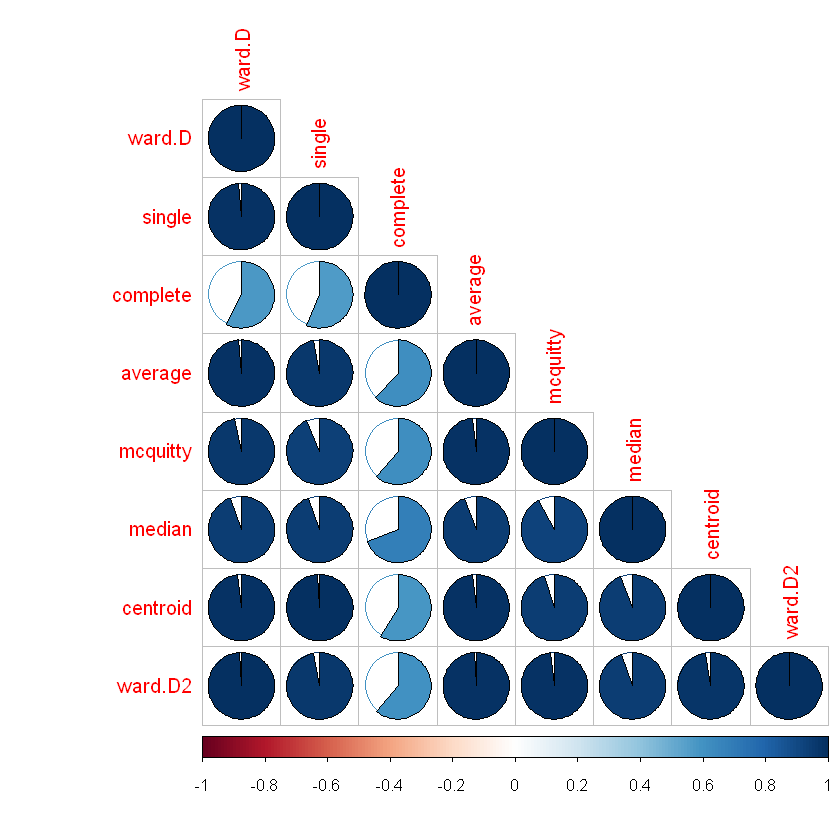

In [56]:
corrplot::corrplot(iris_dendlist_cor, "pie", "lower")

From the above figure, we can easily see that most clustering methods yield very similar results, except for the complete method (the default method in hclust), which yields a correlation measure of around 0.6.

> Using the spearman’s correlation coefficient

Because the default cophenetic correlation uses Pearson.s measure

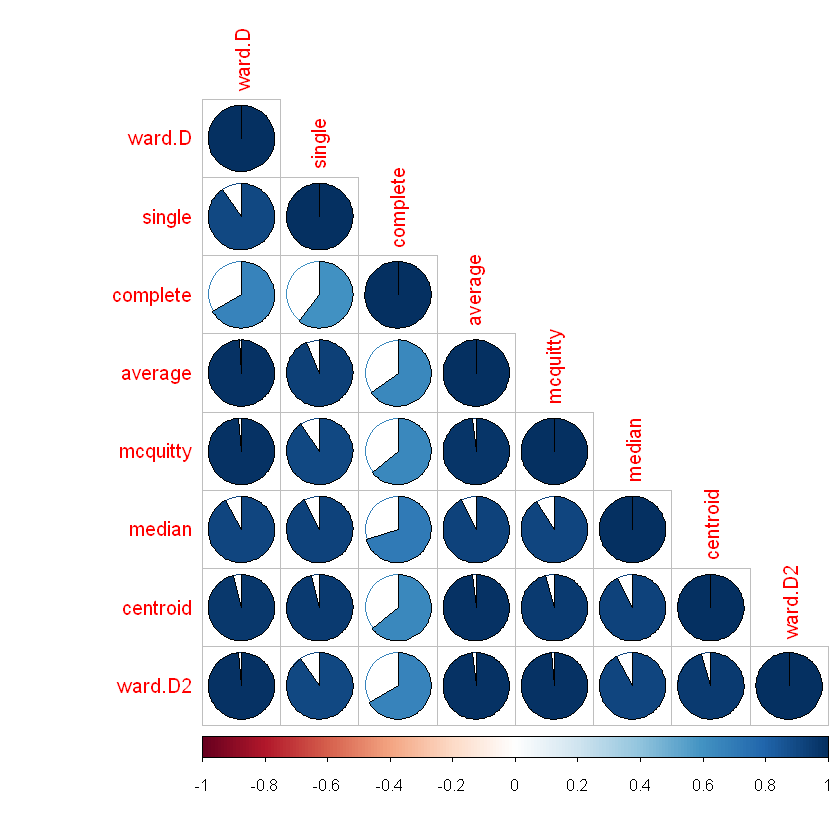

In [57]:
iris_dendlist_cor_spearman <- cor.dendlist(iris_dendlist, method_coef = "spearman")
corrplot::corrplot(iris_dendlist_cor_spearman, "pie", "lower")

> CLUSTERING PREDICTION OF THE 3 SPECIES CLASSES

We would like to see which of the different clustering algorithms came the closest to detecting the 3 flower species (when using a cut of k=3).

For this purpose, we compare the clustering solution of each algorithm with the real clusters, using the Fowlkes-Mallows Index (also using in the package for the Bk_plot). This measure is similar to rand (or rand adjusted) index, and gives a value of 1 when the two clusters confirm, and 0 when they do not.

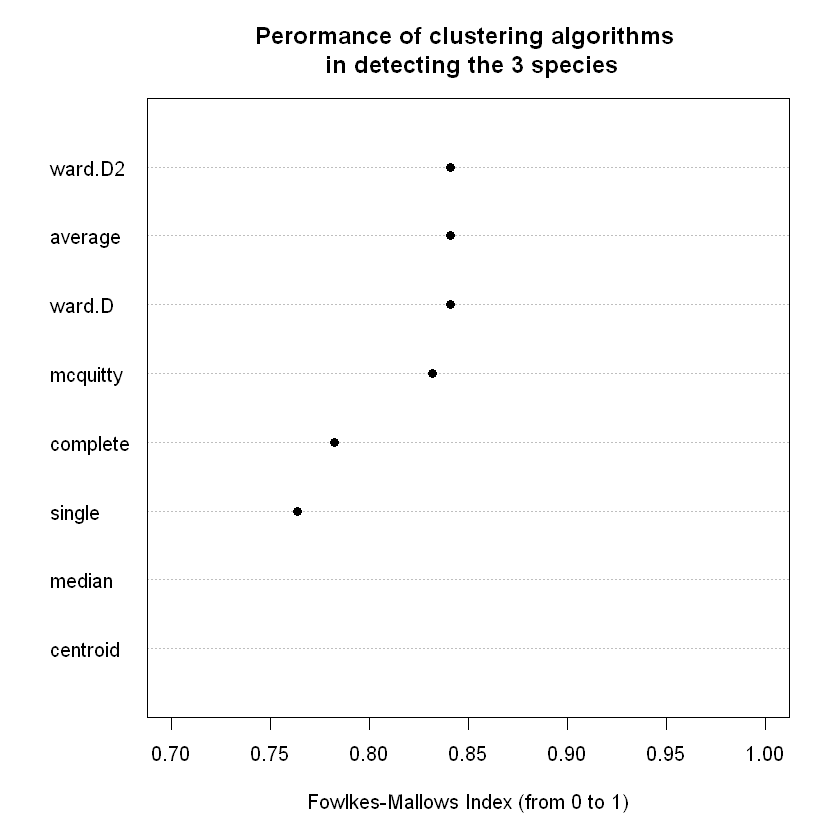

In [58]:
get_ordered_3_clusters <- function(dend) {
   cutree(dend, k = 3)[order.dendrogram(dend)]
}

dend_3_clusters <- lapply(iris_dendlist, get_ordered_3_clusters)

compare_clusters_to_iris <- function(clus) {FM_index(clus, rep(1:3, each = 50), assume_sorted_vectors = TRUE)}

clusters_performance <- sapply(dend_3_clusters, compare_clusters_to_iris)
dotchart(sort(clusters_performance), xlim = c(0.7,1),
         xlab = "Fowlkes-Mallows Index (from 0 to 1)",
         main = "Perormance of clustering algorithms \n in detecting the 3 species",
         pch = 19)

We can see that the “median” method did the best, although similar results were achieved by ward.D2, average, ward.D, and mcquitty. However, the complete, centroid, and single method did worse in our case.